# Introduction

## Data understanding and preparing to predict the outcome

This data analytics report is based on the data for past couple of year collected by Animal Welfare, the analysis is to understand the pattern and risk prediction the animals health in the shelter provided by the Animal Welfare society.

This report follows the approach of CRISP-DM methodology.

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import collections


from pandas import Series
# Import package numpy for numeric computing
import numpy as np

# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#For showing plots directly in the notebook run the command below
%matplotlib inline

# For saving multiple plots into a single pdf file
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import json

### Task 1 : Prepare data quality report

- Check how many rows and columns your CSV has.
- Print the first and the last 5 rows.
- Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuos and which ones as categorical types). 
- Drop duplicate rows and columns, if any.
- Drop constant columns, if any.
- Save your updated/cleaned data frame to a new csv file.

In [2]:
# Check how many rows and columns your CSV has.

file='AnimalWelfareRisk-19200438.csv'
df = pd.read_csv(file)
df.shape

(1000, 22)

In [3]:
# Print first and last 5 rows.

df.head(5)

,Animal ID,Name_Intake,DateTime_Intake,MonthYear_Intake,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Age upon Intake,...,Name_Outcome,DateTime_Outcome,MonthYear_Outcome,Date of Birth,Animal Type_Outcome,Sex upon Outcome,Age upon Outcome,Breed_Outcome,Color_Outcome,binary_outcome
0,A797495,Ace,06/14/2019 11:34:00 AM,06/14/2019 11:34:00 AM,6814 East Riverside Drive in Austin (TX),Stray,Normal,Dog,Neutered Male,3 months,...,Ace,06/15/2019 12:44:00 PM,06/15/2019 12:44:00 PM,02/14/2019,Dog,Neutered Male,3 months,Cairn Terrier,Black/Tan,0.0
1,A801314,NaN,08/02/2019 02:43:00 PM,08/02/2019 02:43:00 PM,11709 Morning View Drive in Travis (TX),Stray,Nursing,Cat,Unknown,2 weeks,...,NaN,08/02/2019 06:22:00 PM,08/02/2019 06:22:00 PM,07/18/2019,Cat,Unknown,2 weeks,Domestic Shorthair,Orange Tabby,0.0
2,A699842,Princess,05/19/2015 12:33:00 PM,05/19/2015 12:33:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,3 months,...,Princess,05/23/2015 02:03:00 PM,05/23/2015 02:03:00 PM,01/23/2015,Dog,Spayed Female,3 months,Chihuahua Shorthair Mix,White/Brown,0.0
3,A801561,Toby,08/05/2019 06:31:00 PM,08/05/2019 06:31:00 PM,3400 Catalina Drive in Austin (TX),Stray,Normal,Cat,Intact Male,3 months,...,Toby,09/02/2019 05:22:00 PM,09/02/2019 05:22:00 PM,04/09/2019,Cat,Neutered Male,4 months,Domestic Shorthair,Black/White,0.0
4,A792521,Tiny,04/11/2019 04:57:00 PM,04/11/2019 04:57:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,2 months,...,Tiny,04/13/2019 11:20:00 AM,04/13/2019 11:20:00 AM,01/20/2019,Dog,Spayed Female,2 months,Chihuahua Shorthair/Dachshund,Tan,0.0


In [4]:
# Print the first and the last 5 rows.

df.tail(5)

,Animal ID,Name_Intake,DateTime_Intake,MonthYear_Intake,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Age upon Intake,...,Name_Outcome,DateTime_Outcome,MonthYear_Outcome,Date of Birth,Animal Type_Outcome,Sex upon Outcome,Age upon Outcome,Breed_Outcome,Color_Outcome,binary_outcome
995,A704490,NaN,06/05/2015 02:05:00 PM,06/05/2015 02:05:00 PM,Becker Ln And Reynero in Del Valle (TX),Stray,Nursing,Dog,Intact Male,1 month,...,NaN,06/05/2015 04:03:00 PM,06/05/2015 04:03:00 PM,04/28/2015,Dog,Intact Male,1 month,Labrador Retriever/Plott Hound,Black Brindle/White,0.0
996,A719587,Andy,01/23/2016 11:01:00 AM,01/23/2016 11:01:00 AM,7201 Levander Loop in Austin (TX),Stray,Normal,Dog,Intact Male,9 months,...,Andy,02/10/2016 01:20:00 PM,02/10/2016 01:20:00 PM,03/30/2015,Dog,Neutered Male,10 months,German Shepherd/Border Collie,Black/White,0.0
997,A722597,Rico,03/19/2016 11:51:00 AM,03/19/2016 11:51:00 AM,Leander (TX),Owner Surrender,Normal,Dog,Neutered Male,13 years,...,Rico,03/20/2016 04:12:00 PM,03/20/2016 04:12:00 PM,03/19/2003,Dog,Neutered Male,13 years,Shih Tzu Mix,Black/White,0.0
998,A806005,NaN,10/04/2019 06:03:00 PM,10/04/2019 06:03:00 PM,13828 Spring Heath Road in Pflugerville (TX),Stray,Nursing,Cat,Unknown,2 days,...,NaN,10/04/2019 06:51:00 PM,10/04/2019 06:51:00 PM,10/02/2019,Cat,Unknown,2 days,Domestic Shorthair,Brown Tabby,0.0
999,A800167,NaN,07/17/2019 11:50:00 AM,07/17/2019 11:50:00 AM,12315 Calduis Road in Austin (TX),Stray,Normal,Cat,Intact Female,2 weeks,...,NaN,07/17/2019 03:17:00 PM,07/17/2019 03:17:00 PM,06/29/2019,Cat,Intact Female,2 weeks,Domestic Shorthair,Buff,0.0


In [5]:
# Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuos and which ones as categorical types).

df.dtypes # check present dataTypes assigned

Animal ID               object
Name_Intake             object
DateTime_Intake         object
MonthYear_Intake        object
Found Location          object
Intake Type             object
Intake Condition        object
Animal Type_Intake      object
Sex upon Intake         object
Age upon Intake         object
Breed_Intake            object
Color_Intake            object
Name_Outcome            object
DateTime_Outcome        object
MonthYear_Outcome       object
Date of Birth           object
Animal Type_Outcome     object
Sex upon Outcome        object
Age upon Outcome        object
Breed_Outcome           object
Color_Outcome           object
binary_outcome         float64
dtype: object

In [6]:
df.nunique() # check the unique values.

Animal ID              1000
Name_Intake             565
DateTime_Intake         992
MonthYear_Intake        992
Found Location          754
Intake Type               6
Intake Condition          8
Animal Type_Intake        5
Sex upon Intake           5
Age upon Intake          39
Breed_Intake            207
Color_Intake            117
Name_Outcome            565
DateTime_Outcome        996
MonthYear_Outcome       996
Date of Birth           852
Animal Type_Outcome       5
Sex upon Outcome          5
Age upon Outcome         39
Breed_Outcome           207
Color_Outcome           117
binary_outcome            2
dtype: int64

In [7]:
# Remove spaces from column names
df.columns = df.columns.str.replace(' ', '')

# Rename the feature "binary_outcome" to "Result"
df = df.rename(columns={'binary_outcome': 'Result'})

#Droping duplicate rows and columns
df=df.T.drop_duplicates().T

df.columns



Index(['AnimalID', 'Name_Intake', 'DateTime_Intake', 'FoundLocation',
       'IntakeType', 'IntakeCondition', 'AnimalType_Intake', 'SexuponIntake',
       'AgeuponIntake', 'Breed_Intake', 'Color_Intake', 'DateTime_Outcome',
       'DateofBirth', 'SexuponOutcome', 'AgeuponOutcome', 'Result'],
      dtype='object')

### Observation:

* Intake type, Intake condition, Animal Type_intake, Sex upon intake, Animal type outcome, Sex upon outcome and Binary_outcome has less unique value so one thing most of the data is from same category.
   - we can use above as categorical values.

In [8]:
categorical_values =['IntakeType','IntakeCondition','AnimalType_Intake','SexuponIntake','SexuponOutcome',
       'Result','Breed_Intake','Color_Intake']
    

From the above data we can understand that the categorical values are rightly examined, though in the Sex upon Intake and Outcome has some Unknown values

In [9]:
for i in categorical_values:
    df[i]= df[i].astype('category')
df.dtypes

AnimalID               object
Name_Intake            object
DateTime_Intake        object
FoundLocation          object
IntakeType           category
IntakeCondition      category
AnimalType_Intake    category
SexuponIntake        category
AgeuponIntake          object
Breed_Intake         category
Color_Intake         category
DateTime_Outcome       object
DateofBirth            object
SexuponOutcome       category
AgeuponOutcome         object
Result               category
dtype: object

In [10]:
#convert the dateTime to get rid of the am and pm
def date_time(ele):
    formats = pd.to_datetime(ele, errors='coerce')
    return formats

df['DateTime_Intake'] = df['DateTime_Intake'].apply(date_time)
df['DateTime_Outcome'] = df['DateTime_Outcome'].apply(date_time)

df['DateofBirth'] = df['DateofBirth'].apply(date_time)


In [11]:
#convert the age of the animals 
def age(x):
    x= str(x)
    if x == '?': 
        return 0
    age = int(x.split()[0])
    if x.find('year') > -1: 
        return age
    if x.find('month')> -1: 
        return age / 12.
    if x.find('week')> -1: 
        return age / 52.
    if x.find('day')> -1: 
        return age / 365.
    else: 
        return 0

df["AgeuponIntake"] = df.AgeuponIntake.apply(age)
df["AgeuponOutcome"] = df.AgeuponOutcome.apply(age)


In [12]:
#Update the numeric features, after converting ID and flag to 'category'.
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['AgeuponIntake', 'AgeuponOutcome'], dtype='object')

In [13]:
#Look at the categorical features only
category_columns = df.select_dtypes(['category']).columns
category_columns

Index(['IntakeType', 'IntakeCondition', 'AnimalType_Intake', 'SexuponIntake',
       'Breed_Intake', 'Color_Intake', 'SexuponOutcome', 'Result'],
      dtype='object')

In [14]:
df.dtypes

AnimalID                     object
Name_Intake                  object
DateTime_Intake      datetime64[ns]
FoundLocation                object
IntakeType                 category
IntakeCondition            category
AnimalType_Intake          category
SexuponIntake              category
AgeuponIntake               float64
Breed_Intake               category
Color_Intake               category
DateTime_Outcome     datetime64[ns]
DateofBirth          datetime64[ns]
SexuponOutcome             category
AgeuponOutcome              float64
Result                     category
dtype: object

In [15]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


In [16]:
# to get year of intake for analysis

df['year'] = pd.DatetimeIndex(df['DateTime_Intake']).year 


In [17]:
# to get month of intake for analysis, so that we can predict the season.

df['month'] = pd.DatetimeIndex(df['DateTime_Intake']).month


In [18]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above

dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


In [19]:
df.head(10)

,AnimalID,Name_Intake,DateTime_Intake,FoundLocation,IntakeType,IntakeCondition,AnimalType_Intake,SexuponIntake,AgeuponIntake,Breed_Intake,Color_Intake,DateTime_Outcome,DateofBirth,SexuponOutcome,AgeuponOutcome,Result,year,month
0,A797495,Ace,2019-06-14 11:34:00,6814 East Riverside Drive in Austin (TX),Stray,Normal,Dog,Neutered Male,0.250000,Cairn Terrier,Black/Tan,2019-06-15 12:44:00,2019-02-14,Neutered Male,0.250000,0.0,2019,6
1,A801314,NaN,2019-08-02 14:43:00,11709 Morning View Drive in Travis (TX),Stray,Nursing,Cat,Unknown,0.038462,Domestic Shorthair,Orange Tabby,2019-08-02 18:22:00,2019-07-18,Unknown,0.038462,0.0,2019,8
2,A699842,Princess,2015-05-19 12:33:00,Austin (TX),Owner Surrender,Normal,Dog,Spayed Female,0.250000,Chihuahua Shorthair Mix,White/Brown,2015-05-23 14:03:00,2015-01-23,Spayed Female,0.250000,0.0,2015,5
3,A801561,Toby,2019-08-05 18:31:00,3400 Catalina Drive in Austin (TX),Stray,Normal,Cat,Intact Male,0.250000,Domestic Shorthair,Black/White,2019-09-02 17:22:00,2019-04-09,Neutered Male,0.333333,0.0,2019,8
4,A792521,Tiny,2019-04-11 16:57:00,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,0.166667,Chihuahua Shorthair/Dachshund,Tan,2019-04-13 11:20:00,2019-01-20,Spayed Female,0.166667,0.0,2019,4
5,A667481,Rocco,2013-11-18 17:58:00,1700 Ledgewood Dr in Austin (TX),Stray,Normal,Dog,Intact Male,2.000000,Rottweiler Mix,Black/Brown,2013-11-20 18:56:00,2011-11-18,Neutered Male,2.000000,0.0,2013,11
6,A773647,NaN,2018-06-04 06:56:00,4434 Frontier Trl in Austin (TX),Stray,Injured,Bird,Unknown,1.000000,Quaker Mix,Green/Gray,2018-06-04 13:08:00,2017-06-04,Unknown,1.000000,0.0,2018,6
7,A719762,Rillo,2016-01-27 12:53:00,1515 Grove Blvd in Austin (TX),Stray,Normal,Dog,Intact Female,0.076923,Pit Bull Mix,Chocolate/White,2016-01-28 18:37:00,2015-12-27,Intact Female,0.076923,0.0,2016,1
8,A798690,NaN,2019-06-29 12:20:00,Wickham Lane And Etheredge Drive in Austin (TX),Stray,Normal,Dog,Intact Male,5.000000,Chihuahua Shorthair,Black/Tricolor,2019-07-03 16:51:00,2014-06-29,Neutered Male,5.000000,0.0,2019,6
9,A736195,NaN,2016-10-06 13:02:00,12112 Scribe Dr in Austin (TX),Stray,Normal,Cat,Intact Male,0.057692,Domestic Medium Hair Mix,Brown Tabby/White,2016-10-06 15:39:00,2016-09-14,Intact Male,0.057692,0.0,2016,10


In [20]:
#Prepare a table with descriptive statistics for all the category features.

df[categorical_values].describe().T

,count,unique,top,freq
IntakeType,1000,6,Stray,699
IntakeCondition,1000,8,Normal,865
AnimalType_Intake,1000,5,Dog,536
SexuponIntake,1000,5,Intact Male,328
SexuponOutcome,1000,5,Neutered Male,343
Result,1000,2,0,921
Breed_Intake,1000,207,Domestic Shorthair Mix,274
Color_Intake,1000,117,Black/White,123


In [21]:
#Prepare a table with descriptive statistics for all the continuous features.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AgeuponIntake,1000.0,2.060484,3.001713,0.00000,0.083333,1.0,2.0,24.0
AgeuponOutcome,1000.0,2.099283,3.008981,0.00274,0.166667,1.0,2.0,24.0
year,1000.0,2016.518000,1.837131,2013.00000,2015.000000,2017.0,2018.0,2020.0
month,1000.0,6.859000,3.300305,1.00000,4.000000,7.0,10.0,12.0


In [22]:
# df.count() gives the number of rows with non-NAN feature value
# Instead of df.isnull().sum() we can use the functions df.shape and df.count()
# numeric_columns_missing = df.shape[0] - df[numeric_columns].count()

# Prepare %missing column
numeric_columns_missing  = 100 * (df[numeric_columns].isnull().sum()/df.shape[0])
# store the values in a dataframe
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing

,%missing
AgeuponIntake,0.0
AgeuponOutcome,0.0


In [23]:
# Prepare %missing column
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

,%missing
IntakeType,0.0
IntakeCondition,0.0
AnimalType_Intake,0.0
SexuponIntake,0.0
Breed_Intake,0.0
Color_Intake,0.0
SexuponOutcome,0.0
Result,0.0


In [24]:
# Add cardinality column
# A simpler way to get the number of unique values per feature
numeric_columns_card = df[numeric_columns].nunique()
# store the values in a dataframe
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
df_numeric_card

,card
AgeuponIntake,38
AgeuponOutcome,38


In [25]:
# Prepare the cardinality column
category_columns_card = df[category_columns].nunique()
# store the values in a dataframe
df_category_card = pd.DataFrame(category_columns_card, columns=['card'])
df_category_card


,card
IntakeType,6
IntakeCondition,8
AnimalType_Intake,5
SexuponIntake,5
Breed_Intake,207
Color_Intake,117
SexuponOutcome,5
Result,2


In [26]:
# Add cardinality values column
df_table_numeric = df[numeric_columns].describe().T

# Put the columns together to prepare the final table for numeric_columns
df_numeric_columns_data_quality_report_table = pd.concat([df_table_numeric, df_numeric_card], axis=1)

# Print data quality report table for numeric features to a file.
df_numeric_columns_data_quality_report_table.to_csv("AnimalWelfare-NumericalFeatures.csv", 
                                         index_label='Feature')
df_numeric_columns_data_quality_report_table

,count,mean,std,min,25%,50%,75%,max,card
AgeuponIntake,1000.0,2.060484,3.001713,0.00000,0.083333,1.0,2.0,24.0,38
AgeuponOutcome,1000.0,2.099283,3.008981,0.00274,0.166667,1.0,2.0,24.0,38


In [27]:
# Add cardinality values column
df_table_categ = df[category_columns].describe().T
# Put the columns together to prepare the final table for numeric_columns
df_category_columns_data_quality_report_table = pd.concat([df_table_categ, df_category_card], axis=1)

# Print data quality report table for categorical features to a file.
# The file will be created in the current folder where jupyter notebook is run from.
df_category_columns_data_quality_report_table.to_csv("AnimalWelfare-CategoryFeatures-Table.csv", 
                                         index_label='Feature')
df_category_columns_data_quality_report_table

,count,unique,top,freq,card
IntakeType,1000,6,Stray,699,6
IntakeCondition,1000,8,Normal,865,8
AnimalType_Intake,1000,5,Dog,536,5
SexuponIntake,1000,5,Intact Male,328,5
Breed_Intake,1000,207,Domestic Shorthair Mix,274,207
Color_Intake,1000,117,Black/White,123,117
SexuponOutcome,1000,5,Neutered Male,343,5
Result,1000,2,0,921,2


## Data Quality Report: Visualisations

In this section we plot histograms and boxplots for numeric features and barplots for numeric and categorical features.

<Figure size 432x288 with 0 Axes>

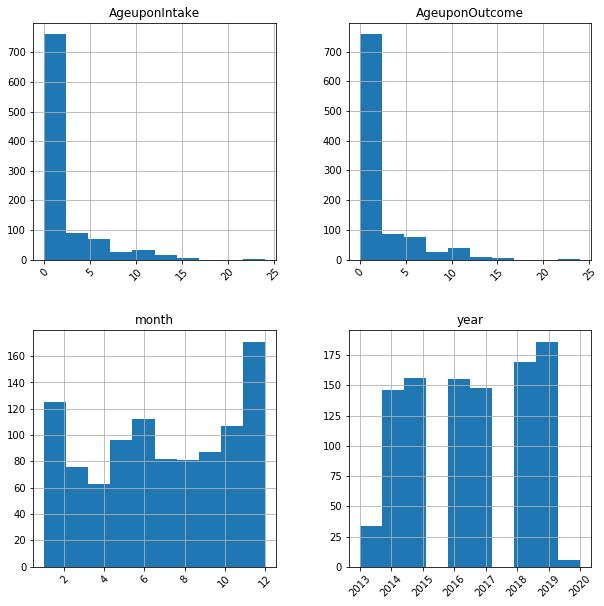

In [28]:
plt.figure()
df.hist(figsize=(10, 10), xrot = 45)
# We can save the plot into a file as shown below.
plt.savefig('AnimalWelfare-NumericFeatures-histograms-1-1.png')

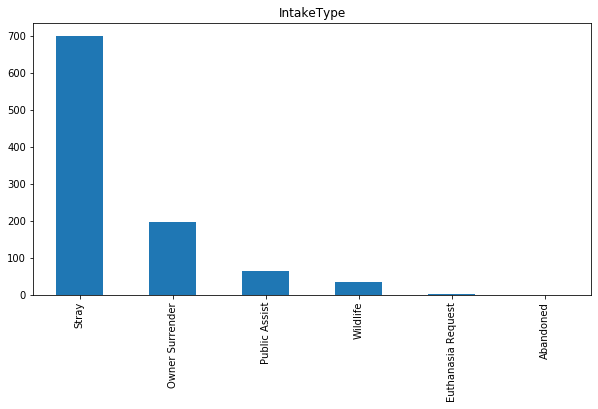

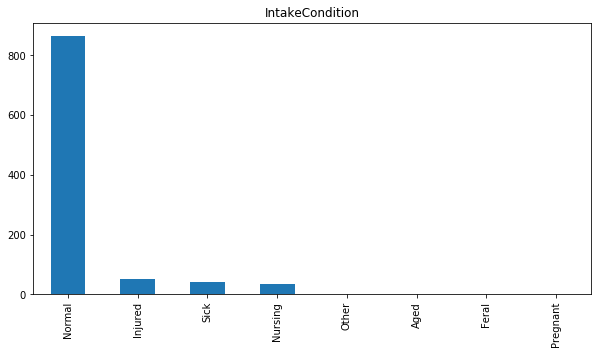

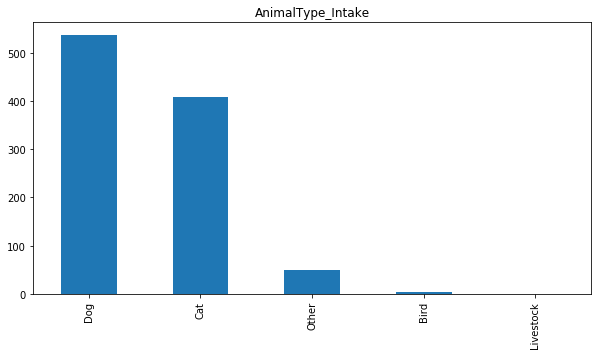

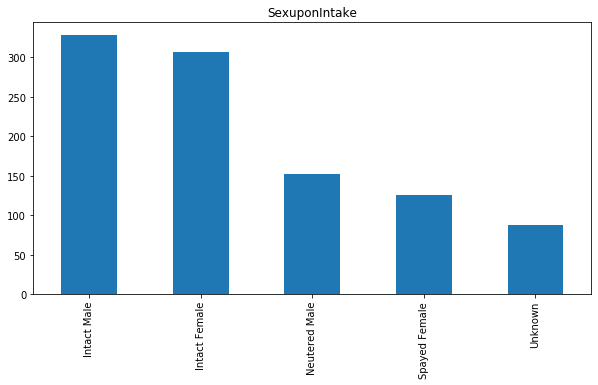

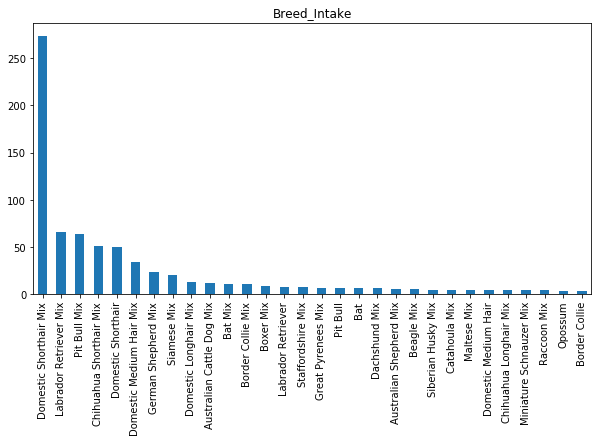

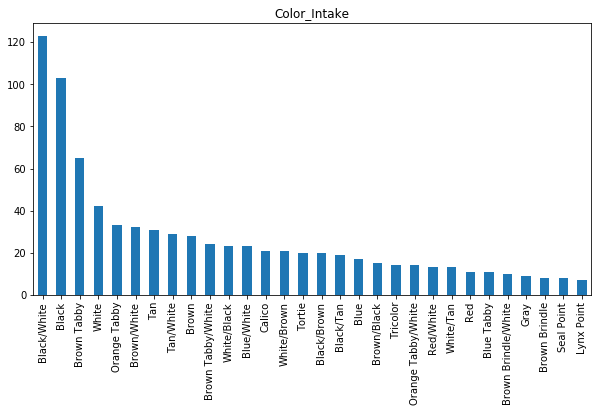

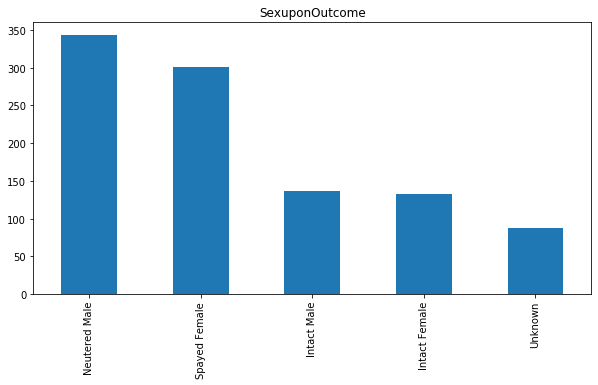

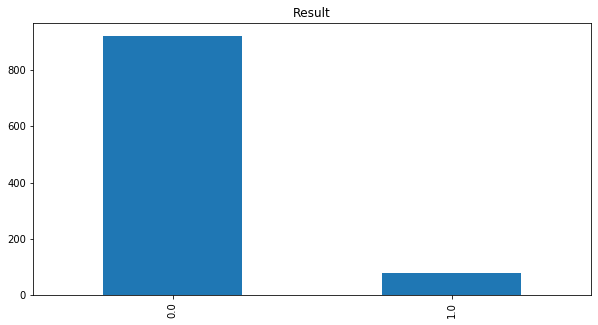

In [29]:
# Plot bar charts for all categorical features and save them in a single PDF file
pp = PdfPages('category_bar_charts.pdf')

for column in category_columns:
    f = df[column].value_counts(dropna=False)[:30].plot(kind='bar', title=column, figsize=(10,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

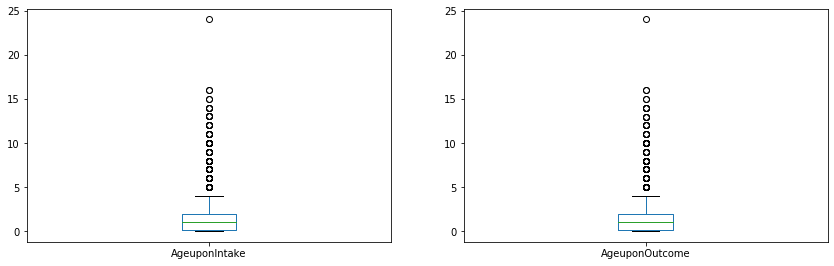

In [30]:
#Plot histograms for all the continuous features.

df[numeric_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(6,4), sharex=False, sharey=False)
plt.savefig('continuous_features.pdf')




## Task 2 : Data Understanding: Data Quality Plan
In this section we list all features and the observations and actions involving those features, as a step towards obtaining a cleaner dataset.

### - Mark down all the features where there are potential problems or data quality issues.

The initial list of issues as identified in the **Data_Quality_Report_Initial_Findings.pdf**:

* For name_intake huge number of missing values
* For found location there is very high cardinality.
* For breed intake has very high cardinality will use top 5 frequent categories.
* The outliers looks ( the age upon intake) need to be investigate.
* Two added column month and year , can be use to predict the weather and outbreak at any particular year (disease which got viral).



## To check the null values and droping the unnecessary columns.

In [31]:
# Keep a copy of the original data
df_raw = df.copy()

In [32]:
df.isnull().sum() # to find the null values 

AnimalID               0
Name_Intake          360
DateTime_Intake        0
FoundLocation          0
IntakeType             0
IntakeCondition        0
AnimalType_Intake      0
SexuponIntake          0
AgeuponIntake          0
Breed_Intake           0
Color_Intake           0
DateTime_Outcome       0
DateofBirth            0
SexuponOutcome         0
AgeuponOutcome         0
Result                 0
year                   0
month                  0
dtype: int64

### Propose solutions to deal with the problems identified. Explain why did you choose one solution over potentially many other.

As data assortment is a costly and additionally tedious procedure, it is the primary need to consistently attempt to keep however much unique information flawless as could be expected before making any cuts or modifications.Belows are based on the principle of data preservation:

- **name intake feature has many missing qualities and is a repetitive section. This gives us no helpful information.** 

About 40% of qualities are absent, as there is no valuable data (extra unneccessary id for the animal), this column will be dropped.

- **Found location has a very high cardinality .**

For found location there is exceptionally high cardinality. This won't generally help that much as far as our concern of this dataset. Along these lines, this column will be dropped. 

- **Breed intake has alot of unique values.**
breed intake has alot of overlapping/cardinality. There are 219 unique values out of 1000. I will sort and pick the top 5-10 values and remaining as others.

- **Color intake has alot of unique values.**
Color intake has a high cardinality.Same as breed intake use the most frequent and rest I will use as others.

- **the outliers in the box plots (age upon intake) should be further investigated here.**
 
 Three ways to dael outliers.
 
- Univariate method: This method looks for data points with extreme values on one variable.
- Multivariate method: Here we look for unusual combinations on all the variables.
- Minkowski error: This method reduces the contribution of potential outliers in the training process.


In [33]:
del df['Name_Intake'] # deleting the unnecessary

In [34]:
del df['FoundLocation'] # deleting the unnecessary
df.head()

,AnimalID,DateTime_Intake,IntakeType,IntakeCondition,AnimalType_Intake,SexuponIntake,AgeuponIntake,Breed_Intake,Color_Intake,DateTime_Outcome,DateofBirth,SexuponOutcome,AgeuponOutcome,Result,year,month
0,A797495,2019-06-14 11:34:00,Stray,Normal,Dog,Neutered Male,0.250000,Cairn Terrier,Black/Tan,2019-06-15 12:44:00,2019-02-14,Neutered Male,0.250000,0.0,2019,6
1,A801314,2019-08-02 14:43:00,Stray,Nursing,Cat,Unknown,0.038462,Domestic Shorthair,Orange Tabby,2019-08-02 18:22:00,2019-07-18,Unknown,0.038462,0.0,2019,8
2,A699842,2015-05-19 12:33:00,Owner Surrender,Normal,Dog,Spayed Female,0.250000,Chihuahua Shorthair Mix,White/Brown,2015-05-23 14:03:00,2015-01-23,Spayed Female,0.250000,0.0,2015,5
3,A801561,2019-08-05 18:31:00,Stray,Normal,Cat,Intact Male,0.250000,Domestic Shorthair,Black/White,2019-09-02 17:22:00,2019-04-09,Neutered Male,0.333333,0.0,2019,8
4,A792521,2019-04-11 16:57:00,Owner Surrender,Normal,Dog,Intact Female,0.166667,Chihuahua Shorthair/Dachshund,Tan,2019-04-13 11:20:00,2019-01-20,Spayed Female,0.166667,0.0,2019,4


In [35]:
# frequnecies of the elements in categorical features.

for i in categorical_values:
    frequency = df[i].value_counts().head(15)
    print("Frequency of ",i,":")
    print(frequency,'\n')

Frequency of  IntakeType :
Stray                 699
Owner Surrender       196
Public Assist          65
Wildlife               36
Euthanasia Request      3
Abandoned               1
Name: IntakeType, dtype: int64 

Frequency of  IntakeCondition :
Normal      865
Injured      51
Sick         41
Nursing      34
Other         3
Aged          3
Feral         2
Pregnant      1
Name: IntakeCondition, dtype: int64 

Frequency of  AnimalType_Intake :
Dog          536
Cat          409
Other         49
Bird           5
Livestock      1
Name: AnimalType_Intake, dtype: int64 

Frequency of  SexuponIntake :
Intact Male      328
Intact Female    307
Neutered Male    152
Spayed Female    126
Unknown           87
Name: SexuponIntake, dtype: int64 

Frequency of  SexuponOutcome :
Neutered Male    343
Spayed Female    301
Intact Male      137
Intact Female    132
Unknown           87
Name: SexuponOutcome, dtype: int64 

Frequency of  Result :
0.0    921
1.0     79
Name: Result, dtype: int64 

Frequency

In [36]:
df.columns

Index(['AnimalID', 'DateTime_Intake', 'IntakeType', 'IntakeCondition',
       'AnimalType_Intake', 'SexuponIntake', 'AgeuponIntake', 'Breed_Intake',
       'Color_Intake', 'DateTime_Outcome', 'DateofBirth', 'SexuponOutcome',
       'AgeuponOutcome', 'Result', 'year', 'month'],
      dtype='object')

### Most of the animals are either dog or cat. So, will create a diffrent data set as Dog and Cat for further operations.

We will first take the Animal type( Dog , Cat , Other) as a data set and the in that data set will divide on the basis of sex and each sex will get divided into all the remaining categorical feature and will analyse taking result (0 - Alive or 1 - Dead) as reference

In [37]:
Dog = df[df['AnimalType_Intake'] =='Dog']
# Top 20
Dog['Breed_Intake'].value_counts().head(20)
#dogs

Labrador Retriever Mix       66
Pit Bull Mix                 64
Chihuahua Shorthair Mix      51
German Shepherd Mix          24
Australian Cattle Dog Mix    12
Border Collie Mix            11
Boxer Mix                     9
Staffordshire Mix             8
Labrador Retriever            8
Pit Bull                      7
Great Pyrenees Mix            7
Dachshund Mix                 7
Australian Shepherd Mix       6
Beagle Mix                    6
Miniature Schnauzer Mix       5
Maltese Mix                   5
Catahoula Mix                 5
Siberian Husky Mix            5
Chihuahua Longhair Mix        5
Cairn Terrier Mix             4
Name: Breed_Intake, dtype: int64

In [38]:
Cat = df[df['AnimalType_Intake'] =='Cat']
# Top 20
Cat['Breed_Intake'].value_counts().head(20)

Domestic Shorthair Mix                 274
Domestic Shorthair                      50
Domestic Medium Hair Mix                34
Siamese Mix                             21
Domestic Longhair Mix                   13
Domestic Medium Hair                     5
Siamese                                  2
Snowshoe Mix                             2
American Shorthair Mix                   1
Himalayan Mix                            1
Domestic Longhair/Domestic Longhair      1
Domestic Longhair                        1
Bombay Mix                               1
Balinese                                 1
Manx Mix                                 1
Himalayan                                1
Chinese Sharpei                          0
Chinese Sharpei Mix                      0
Cockatiel Mix                            0
Cocker Spaniel                           0
Name: Breed_Intake, dtype: int64

- As we can see the majority of animals are Dog (536) and Cat (409). Therefore will keep three values , Dog, Cat and others

- As we can see, majority of dogs are Pit Bull Mix (64) Chihuahua Shorthair Mix (51) and Labrador Retriever Mix (66). Therefore these will be kept and the rest of the dog breed be put into different groups as described above.

- As we can see, the majority breeds of cats are Domestic with differebt hair types will make the whole as Domestic.

In [39]:
list_1 = []

for i in df['Color_Intake']:
    i = str(i)
    if i.find('/') >= 0:
        f, s = i.split('/')
        list_1.append(f)
    else:
        list_1.append(i)

df['Color_Intake'] = Series(list_1)

def get_mainC(attr):
    attr = str(attr)
    if attr.find('Black') >= 0: return 'dark'
    if attr.find('White') >= 0: return 'light'
    if attr.find('Brown') >= 0: return 'dark'
    if attr.find('Orange') >= 0: return 'light'
    if attr.find('Blue') >= 0: return 'medium'
    if attr.find('Red') >= 0: return 'medium'
    
    if attr.find('Tan') >= 0: return 'medium'
    if attr.find('Tortie') >= 0: return 'dark'
    if attr.find('Calico') >= 0: return 'medium'
    if attr.find('Torbie') >= 0: return 'medium'
    if attr.find('Buff') >= 0: return 'light'
    if attr.find('Sable') >= 0: return 'dark'
    if attr.find('Cream') >= 0: return 'light'
    if attr.find('Yellow') >= 0: return 'light'
    if attr.find('Lynx') >= 0: return 'light'
    if attr.find('Chocolate') >= 0: return 'dark'
    if attr.find('Gray') >= 0: return 'dark'
    if attr.find('Liver') >= 0: return 'dark'
    if attr.find('Flame') >= 0: return 'light'
    if attr.find('Agouti') >= 0: return 'dark'
    if attr.find('Pink') >= 0: return 'light'
    if attr.find('Ruddy') >= 0: return 'medium'
    if attr.find('Gold') >= 0: return 'light'
    if attr.find('Silver') >= 0: return 'light'
    if attr.find('Lilac') >= 0: return 'light'
    if attr.find('Seal') >= 0: return 'medium'
    if attr.find('Fawn') >= 0: return 'light'
    if attr.find('Apricot') >= 0: return 'light'
    else: return attr

df['Color_Intake'] = df.Color_Intake.apply(get_mainC)
df['Color_Intake'].value_counts()

dark        542
light       230
medium      212
Tricolor     15
Green         1
Name: Color_Intake, dtype: int64

In [40]:
#The outliers in the box plots (age) initially appear need to be investigate further.

df.sort_values(by='AgeuponIntake', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='first')[['AgeuponIntake'
]].head(25)

,AgeuponIntake
215,24.0
10,16.0
874,16.0
401,15.0
161,15.0
271,14.0
248,14.0
526,14.0
170,14.0
628,13.0


### Data quality plan:
   
| Feature                 | Data Quality Issue   | Handling Strategy            |
|-------------------------|----------------------|------------------------------|
| Name_intake             | Missing Values | Column Dropped                   |
| Found Location          | High Cardinality    | Column Dropped       | 
| Sex upon intake         | Missing Values 'unknown' | changed to others                |
| Breed Intake              | High Cardinality | Has to do operation                |
| Color Intake              | High Cardinality | Operted and changed               |
| DateTimeIntake          | Invalid Data type | Changed Data Type              |
| DateTimeOutcome                | Invalid Data type| Changed Data Type            |
| Age Upon Intake              | Cardinality          | Changed to years         |
| Age Upon Outcome             | Outliers             | Changed to years


### Save the new CSV with self explanatory name. And make the PDF of the Data Quality Plan.

In [41]:
# Write the df to a csv file
df.to_csv('AnimalWelfareRisk-19200438-updated-2.csv', index=False)

## Task 3 - Exploring relationships between feature pairs:

- Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). 
- Explain your choices.
- Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome? Explain in plain words (a short paragraph) the story of your findings so far.

The features that I will look at for pairwise feature interaction are the 
and the following categorical features:
- IntakeType
- IntakeCondition
- AnimalType_Intake
- SexuponIntake
- SexuponOutcome
- Breed_Intake
- Color_Intake
- Result
- Year
- Month

following continuous features:
- AgeUponIntake
- AgeUponOutcome

#### Note: In result good is 0 and bad is 1

### 3.1 Correlations for the numeric features

In [42]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


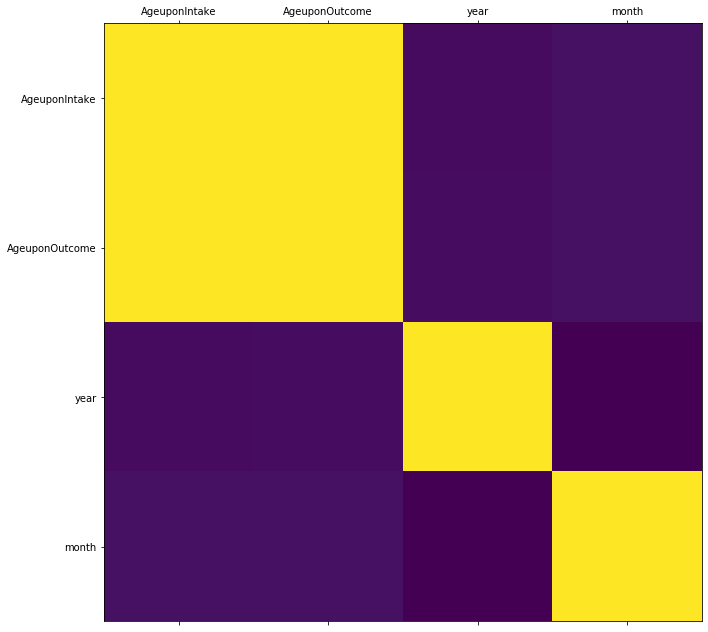

In [43]:
plot_corr(df)

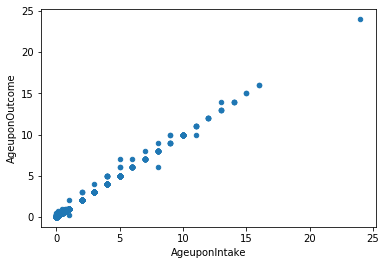

In [44]:
df.plot(kind='scatter', x='AgeuponIntake', y='AgeuponOutcome')


###### Observation :
1. Correlation plot shows the high correlation between ageuponintake and ageuponoutcome.

2. Scatter Plots shows that categorical features with high correlation are somewhat linear.The age outcome has a straight line cut off. This basically means that animals coming out is older than when they are taking in. This is likely AT making a protected suspicion about animal age days in the shelter house, possibly checking the days from when the animal first register.

In [45]:
animalType_Intake = pd.unique(df["AnimalType_Intake"].ravel())
animalType_Intake

array(['Dog', 'Cat', 'Bird', 'Other', 'Livestock'], dtype=object)

Dog 	 536
Cat 	 409
Bird 	 5
Other 	 49
Livestock 	 1


(0, 100)

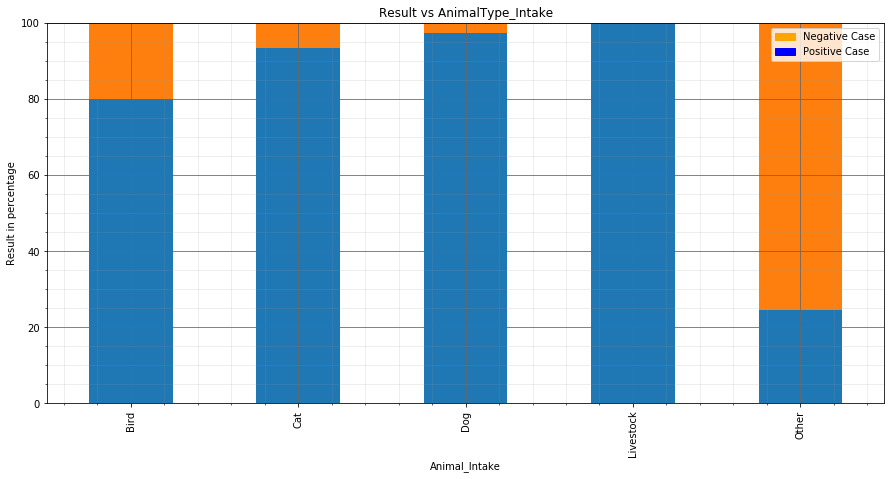

In [46]:
df['percent'] = 0

for i in animalType_Intake:
    
    count = df[df["AnimalType_Intake"] == i].count()['Result']
    count_percentage = (1 / count) * 100

 # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['AnimalType_Intake'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage

        
        
group = df[['percent','AnimalType_Intake','Result']].groupby(['AnimalType_Intake','Result']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Result vs AnimalType_Intake", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative Case')
blue_patch = mpatches.Patch(color='blue', label='Positive Case')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Animal_Intake")
my_plot.set_ylabel("Result in percentage")
my_plot.set_ylim([0,100])

#### Observation :
* Dogs have better postive result compare to the other types.

Stray 	 699
Owner Surrender 	 196
Wildlife 	 36
Public Assist 	 65
Euthanasia Request 	 3
Abandoned 	 1


(0, 100)

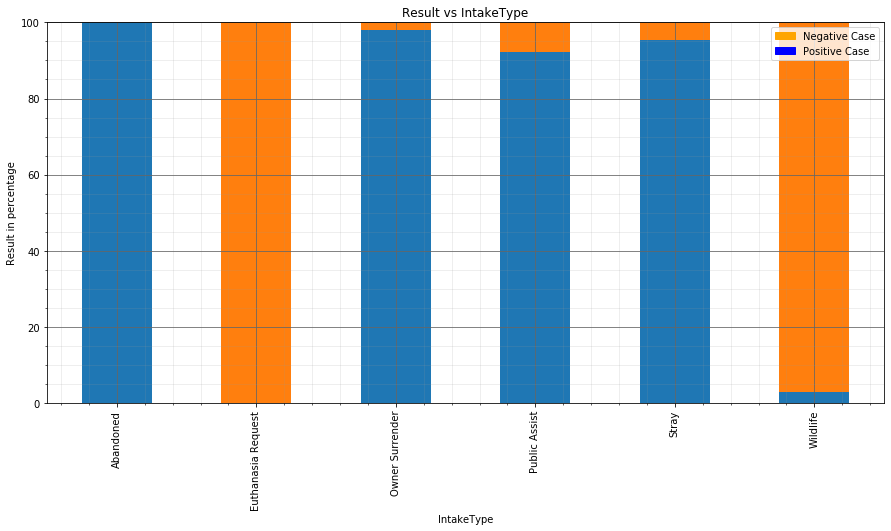

In [47]:
intaketype = pd.unique(df["IntakeType"].ravel())


df['percent'] = 0

for i in intaketype:
    
    count = df[df["IntakeType"] == i].count()['Result']
    count_percentage = (1 / count) * 100

 # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['IntakeType'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage

        
        
group = df[['percent','IntakeType','Result']].groupby(['IntakeType','Result']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Result vs IntakeType", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative Case')
blue_patch = mpatches.Patch(color='blue', label='Positive Case')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("IntakeType")
my_plot.set_ylabel("Result in percentage")
my_plot.set_ylim([0,100])

#### Observation :

Euthanasia Request animals have a very high bad result around 100% followed by Wild life  of 97% bad outcome. This may be because people may not want to adopt them.
Stray has a negative outcome of around 5 %. which is not bad comapred to other two.
Owner surrender and Public Assist seems to have a very high good outcome.

Neutered Male 	 152
Unknown 	 87
Spayed Female 	 126
Intact Male 	 328
Intact Female 	 307


(0, 100)

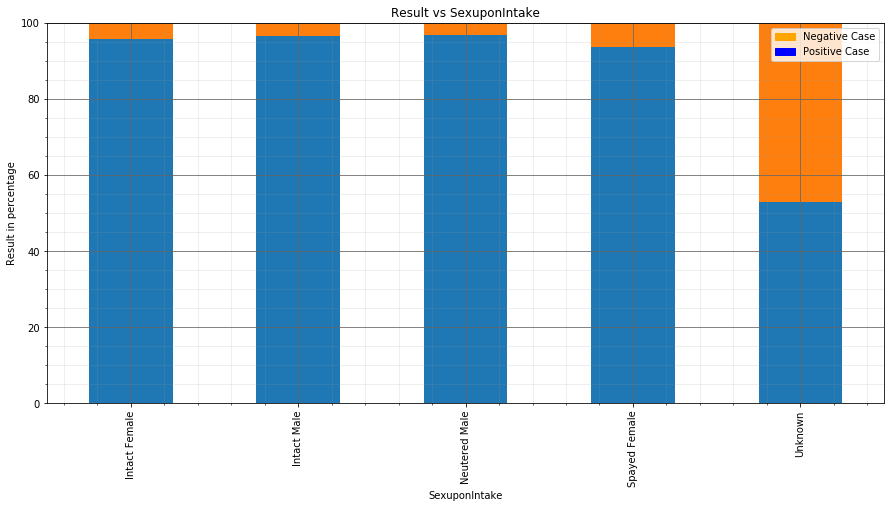

In [48]:
gender = pd.unique(df["SexuponIntake"].ravel())


df['percent'] = 0

for i in gender:
    
    count = df[df["SexuponIntake"] == i].count()['Result']
    count_percentage = (1 / count) * 100

 # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['SexuponIntake'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage

        
        
group = df[['percent','SexuponIntake','Result']].groupby(['SexuponIntake','Result']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Result vs SexuponIntake", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative Case')
blue_patch = mpatches.Patch(color='blue', label='Positive Case')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("SexuponIntake")
my_plot.set_ylabel("Result in percentage")
my_plot.set_ylim([0,100])

From the above plot we can understand that alot of animals come in as intact and leave that Neutered male or Spayed female.

Normal 	 865
Nursing 	 34
Injured 	 51
Sick 	 41
Aged 	 3
Other 	 3
Feral 	 2
Pregnant 	 1


(0, 100)

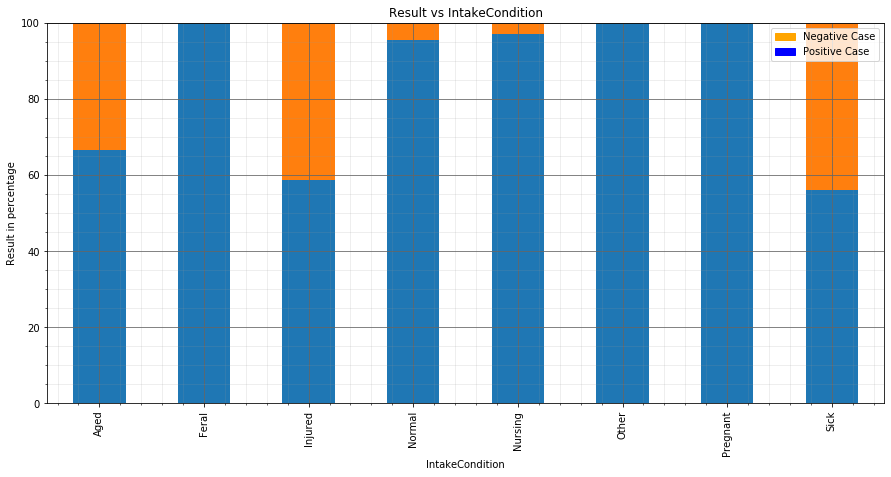

In [49]:
intakeCondition = pd.unique(df["IntakeCondition"].ravel())


df['percent'] = 0

for i in intakeCondition:
    
    count = df[df["IntakeCondition"] == i].count()['Result']
    count_percentage = (1 / count) * 100

 # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['IntakeCondition'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage

        
        
group = df[['percent','IntakeCondition','Result']].groupby(['IntakeCondition','Result']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Result vs IntakeCondition", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative Case')
blue_patch = mpatches.Patch(color='blue', label='Positive Case')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("IntakeCondition")
my_plot.set_ylabel("Result in percentage")
my_plot.set_ylim([0,100])

From above we can see that the highest negative result for intake condition is 'sick' which is more than 45%, this is not a suprise as injured animals have less chance of survival as well.And followed by the aged which is around 35%.

In [50]:
df.head()

,AnimalID,DateTime_Intake,IntakeType,IntakeCondition,AnimalType_Intake,SexuponIntake,AgeuponIntake,Breed_Intake,Color_Intake,DateTime_Outcome,DateofBirth,SexuponOutcome,AgeuponOutcome,Result,year,month,percent
0,A797495,2019-06-14 11:34:00,Stray,Normal,Dog,Neutered Male,0.250000,Cairn Terrier,dark,2019-06-15 12:44:00,2019-02-14,Neutered Male,0.250000,0.0,2019,6,0.115607
1,A801314,2019-08-02 14:43:00,Stray,Nursing,Cat,Unknown,0.038462,Domestic Shorthair,light,2019-08-02 18:22:00,2019-07-18,Unknown,0.038462,0.0,2019,8,2.941176
2,A699842,2015-05-19 12:33:00,Owner Surrender,Normal,Dog,Spayed Female,0.250000,Chihuahua Shorthair Mix,light,2015-05-23 14:03:00,2015-01-23,Spayed Female,0.250000,0.0,2015,5,0.115607
3,A801561,2019-08-05 18:31:00,Stray,Normal,Cat,Intact Male,0.250000,Domestic Shorthair,dark,2019-09-02 17:22:00,2019-04-09,Neutered Male,0.333333,0.0,2019,8,0.115607
4,A792521,2019-04-11 16:57:00,Owner Surrender,Normal,Dog,Intact Female,0.166667,Chihuahua Shorthair/Dachshund,medium,2019-04-13 11:20:00,2019-01-20,Spayed Female,0.166667,0.0,2019,4,0.115607


dark 	 542
light 	 230
medium 	 212
Green 	 1
Tricolor 	 15


(0, 100)

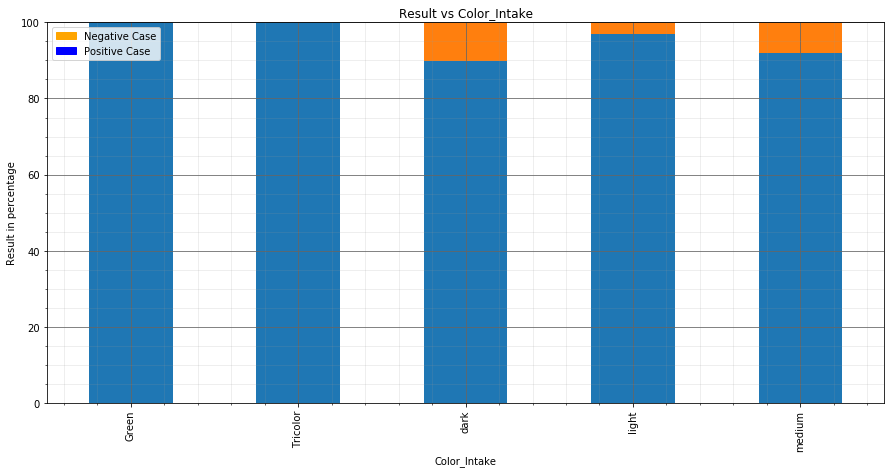

In [51]:
color = pd.unique(df["Color_Intake"].ravel())


df['percent'] = 0

for i in color:
    
    count = df[df["Color_Intake"] == i].count()['Result']
    count_percentage = (1 / count) * 100

 # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['Color_Intake'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage

        
        
group = df[['percent','Color_Intake','Result']].groupby(['Color_Intake','Result']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Result vs Color_Intake", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative Case')
blue_patch = mpatches.Patch(color='blue', label='Positive Case')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Color_Intake")
my_plot.set_ylabel("Result in percentage")
my_plot.set_ylim([0,100])

As we can see the dark and medium color animals are prone to negative result. 

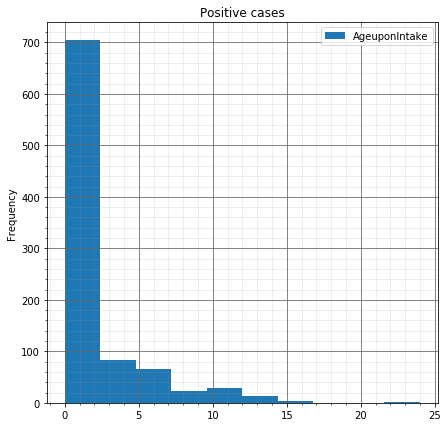

In [52]:
df[df['Result'] == 0][['AgeuponIntake']].plot(kind='hist',figsize=(7,7), bins=10, title="Positive cases")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

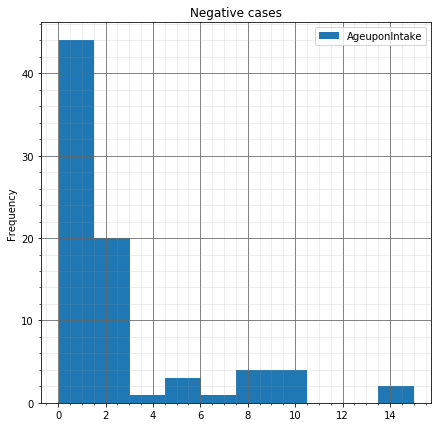

In [53]:
df[df['Result'] == 1][['AgeuponIntake']].plot(kind='hist',figsize=(7,7), bins=10, title="Negative cases")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

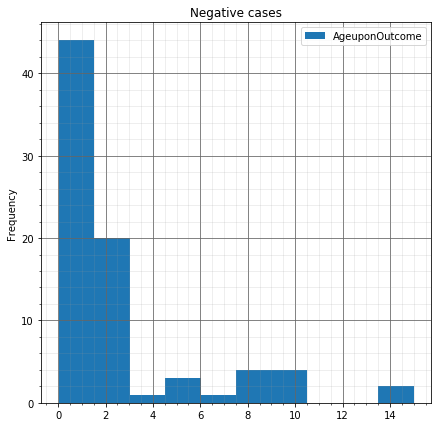

In [54]:
df[df['Result'] == 1][['AgeuponOutcome']].plot(kind='hist',figsize=(7,7), bins=10, title="Negative cases")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

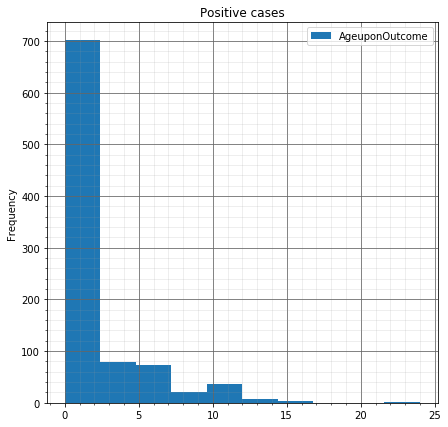

In [55]:
df[df['Result'] == 0][['AgeuponOutcome']].plot(kind='hist',figsize=(7,7), bins=10, title="Positive cases")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

<Figure size 432x288 with 0 Axes>

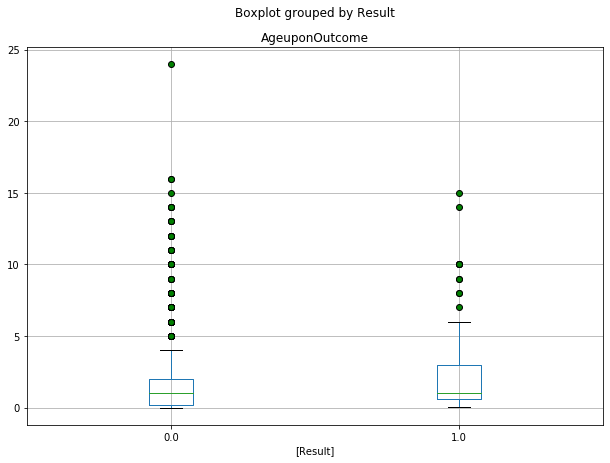

In [56]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['AgeuponOutcome'], by=['Result'], flierprops=flierprops, figsize=(10,7))

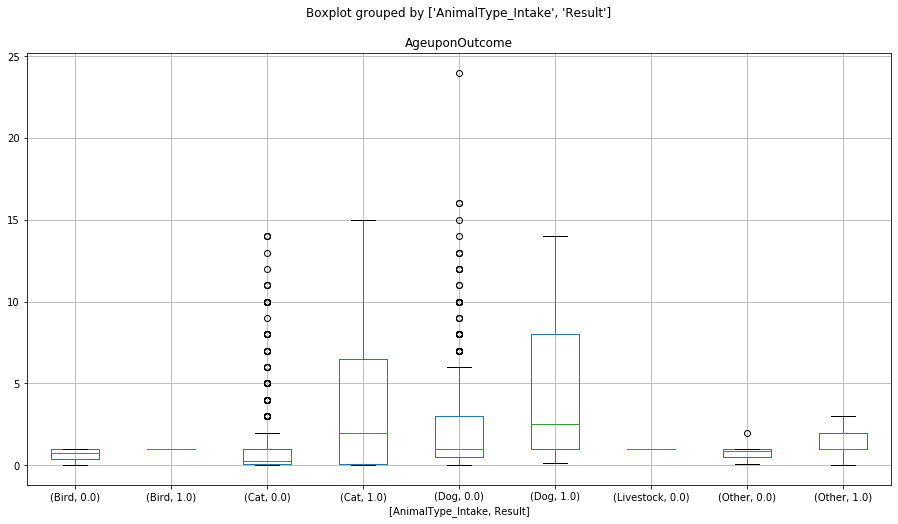

In [57]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15, 8)

df[['Result','AgeuponOutcome','AnimalType_Intake']].boxplot(by=['AnimalType_Intake','Result'])

In [58]:
num_obs = len(df)
num_sucess = len(df.loc[df['Result'] == 0])
num_failure = len(df.loc[df['Result'] == 1])
print("Number of Success cases:  {0} ({1:2.2f}%)".format(num_sucess, (num_sucess/num_obs) * 100))
print("Number of Failurelse cases: {0} ({1:2.2f}%)".format(num_failure, (num_failure/num_obs) * 100))

Number of Success cases:  921 (92.10%)
Number of Failurelse cases: 79 (7.90%)


## Task 4 - Transform, extend or combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. 

### Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name.






#### 1. Time_stayed : A new feature I am introducing is the time the animal stayed in shelter. From the date time intake and  data time outcome.

#### 2. Month : A new feature which can help us in predecting the relation between the result and intake season.

#### 3. Year : A new feature which can help us in predecting any specif outbreak in a particular year.

In [59]:
# df['outcome_datetime'] = pd.to_datetime(in_out['outcome_datetime'])
# df['intake_datetime'] = pd.to_datetime(in_out['intake_datetime'])

df['Time_stayed'] = df['DateTime_Outcome'] - df['DateTime_Intake']

In [60]:
df['Time_stayed'].describe()

count                       1000
mean     15 days 22:10:37.620000
std      54 days 09:49:04.603203
min          -767 days +08:35:00
25%              1 days 01:59:30
50%              5 days 00:21:30
75%             15 days 00:08:00
max            870 days 20:49:00
Name: Time_stayed, dtype: object

Interestingly, the minimum time an animal was in the shelter is -767 days,which is impossible senario. To investigate a little further, we can filter the dataset for intake datetimes that are more recent than their outcomes.

In [61]:
in_later = df[['DateTime_Intake', 'DateTime_Outcome']][df['DateTime_Intake'] > df['DateTime_Outcome']]

print(len(in_later))
in_later.head()

10


,DateTime_Intake,DateTime_Outcome
24,2015-06-19 17:17:00,2015-06-19 00:00:00
40,2019-02-25 18:07:00,2018-02-20 18:32:00
46,2018-12-04 11:08:00,2018-11-26 17:05:00
121,2015-12-16 11:46:00,2015-12-06 15:05:00
206,2019-10-07 15:17:00,2019-10-07 10:31:00


The length of the garbage data indicates there are just 10 records that have a intake time after the outcome time.

In [62]:
df['DateTime_Intake'], df['DateTime_Outcome'] = np.where(df['DateTime_Intake'] > df['DateTime_Outcome'],
                                                                [df['DateTime_Outcome'], df['DateTime_Intake']],
                                                                [df['DateTime_Intake'], df['DateTime_Outcome']])

In [63]:
df['Time_stayed'] = pd.to_datetime(df['DateTime_Outcome']) - pd.to_datetime(df['DateTime_Intake'])
df['Time_stayed'].describe()

count                       1000
mean     19 days 09:00:25.620000
std      53 days 06:38:20.824403
min              0 days 00:01:00
25%              1 days 02:46:45
50%              5 days 00:55:00
75%             15 days 02:32:45
max            870 days 20:49:00
Name: Time_stayed, dtype: object

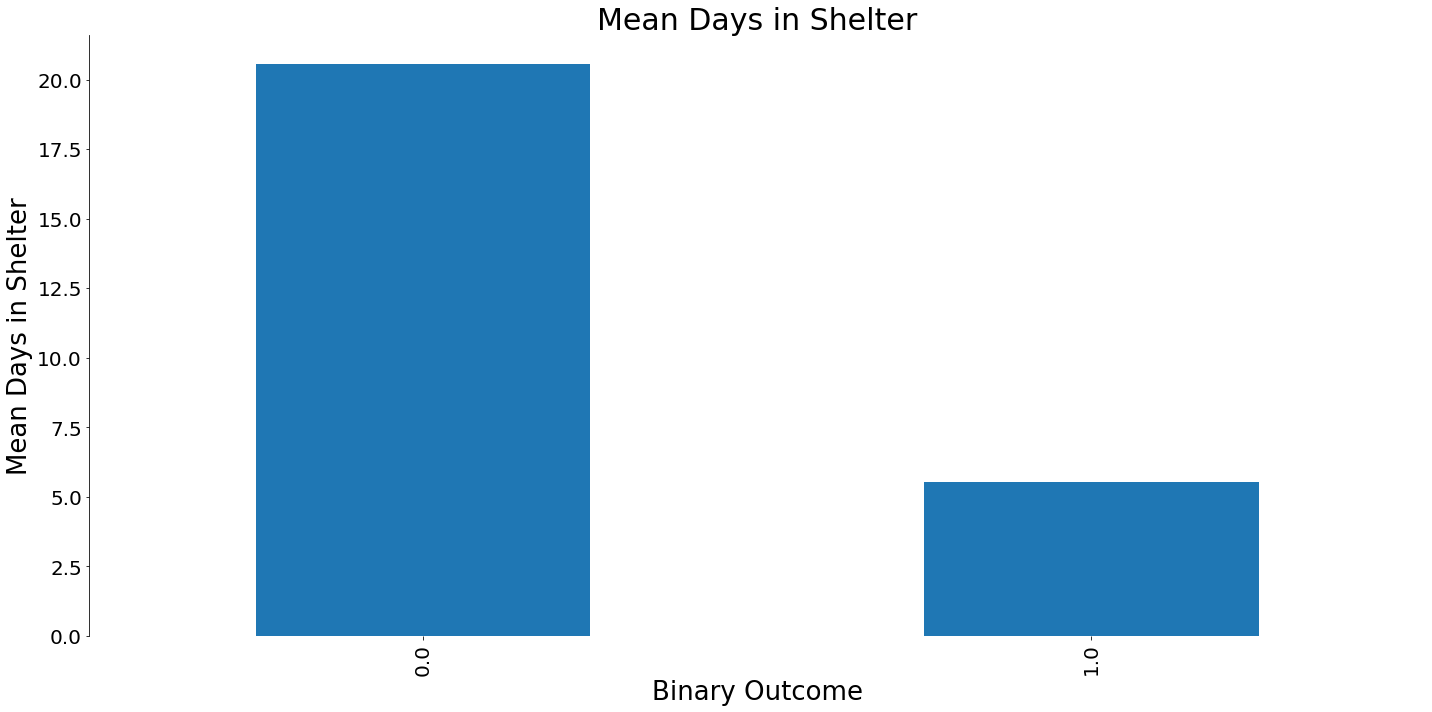

In [64]:
df['Time_stayed'] = pd.to_timedelta(df['Time_stayed'])
df['Time_stayed_days'] = df['Time_stayed'].dt.total_seconds() / (24 * 60 * 60)

intake_cond_out_time = df.groupby(['Result'])['Time_stayed_days'].mean().sort_values(ascending=False).plot(kind='bar', 
                                                                                                                                figsize=(20, 10),
                                                                                                                                fontsize=20)
intake_cond_out_time.set_ylabel('Mean Days in Shelter', fontsize=26)
intake_cond_out_time.set_xlabel('Binary Outcome', fontsize=26)
intake_cond_out_time.set_title('Mean Days in Shelter', fontsize=30)

plt.tight_layout()
sns.despine(bottom=True)

The chart determines the less days remained in the shelter house the higher the awful result is. This can be the demise of creature which decreases the days remained in the asylum.

In [ ]:
month = pd.unique(df["month"].ravel())


df['percent'] = 0

for i in month:
    
    count = df[df["month"] == i].count()['Result']
    count_percentage = (1 / count) * 100

 # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['month'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage

        
        
group = df[['percent','month','Result']].groupby(['month','Result']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Result vs month", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative Case')
blue_patch = mpatches.Patch(color='blue', label='Positive Case')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("month")
my_plot.set_ylabel("Result in percentage")
my_plot.set_ylim([0,100])

6 	 112
8 	 81
5 	 96


From the above chart we can see that the animals that came in first 3 months(January-March) and in last 3 months(October-December) have higher negative result compared to other animals in the shelter.

In [ ]:
df.to_csv('AnimalWelfareRisk-19200438-updated-3-final.csv')


#### Conclusion

* The wild animals are more negative result giving may be because people don't want to adopt them. 
* Dogs have higher positive result compared to others in the category.
* The highest negative result for intake condition is 'injured' as injured animals have less chance of survival.where as sick 60% and aged too.
* The most positive result is normal. And it makes sense even because people would prefere adopt animals with normal conditions.
* Euthanasia request,as no suprise has high negative result because people want them to get killed.